You are a data scientist working for a healthcare company, and you have been tasked with creating a 
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been 
given a dataset (diabetes.csv) with the following variables:

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to 
understand the distribution and relationships between the variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot: >

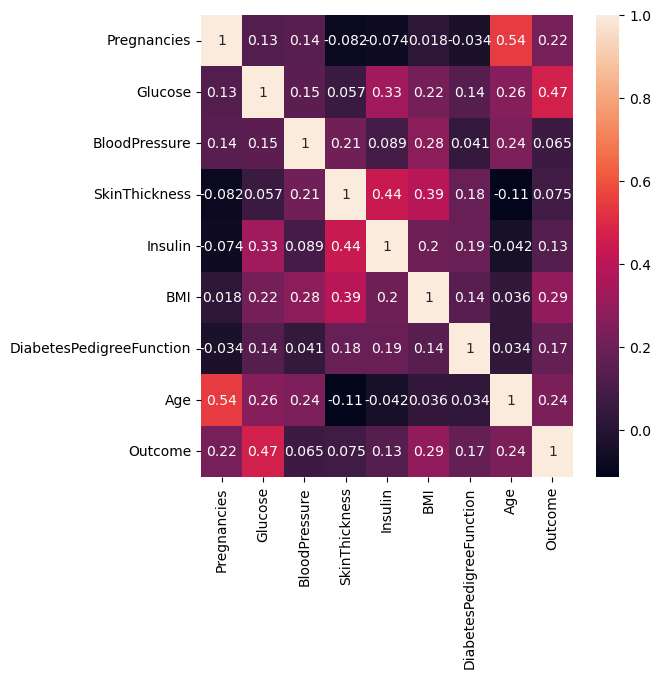

In [7]:
import seaborn as sns
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), annot = True)

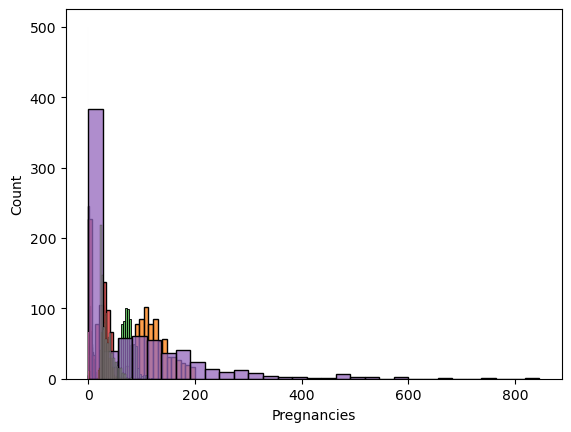

In [8]:
for i in df.columns:
    sns.histplot(df[i])

Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical 
variables into dummy variables if necessary.

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df[df.duplicated() == True]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [11]:
df2 = df

In [12]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [14]:
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

In [15]:
df[outliers]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1
12,10,139,80,0,0,27.1,1.441,57,0
...,...,...,...,...,...,...,...,...,...
706,10,115,0,0,0,0.0,0.261,30,1
707,2,127,46,21,335,34.4,0.176,22,0
710,3,158,64,13,387,31.2,0.295,24,0
715,7,187,50,33,392,33.9,0.826,34,1


In [16]:
df2 = df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1) == False]

In [17]:
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [18]:
x = df2.iloc[:,:-1]

In [19]:
y = df2['Outcome']

In [20]:
y = np.array(y)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.33, random_state = 42)

Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use 
cross-validation to optimize the hyperparameters and avoid overfitting.

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
parameter = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : [1,2,3,4,5],
    'max_features' : ['auto', 'sqrt', 'log2']}

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
clss = DecisionTreeClassifier()

In [39]:
clf = GridSearchCV(clss, param_grid = parameter, cv=5, scoring = 'accuracy')

In [40]:
clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [41]:
clf.best_params_

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'random'}

In [43]:
y_pred = clf.predict(x_test)

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, 
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [46]:
from sklearn.metrics import accuracy_score, classification_report

In [47]:
score = accuracy_score(y_pred, y_test)

In [48]:
score

0.7345971563981043

In [49]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.74      0.83       181
           1       0.31      0.70      0.43        30

    accuracy                           0.73       211
   macro avg       0.62      0.72      0.63       211
weighted avg       0.85      0.73      0.77       211



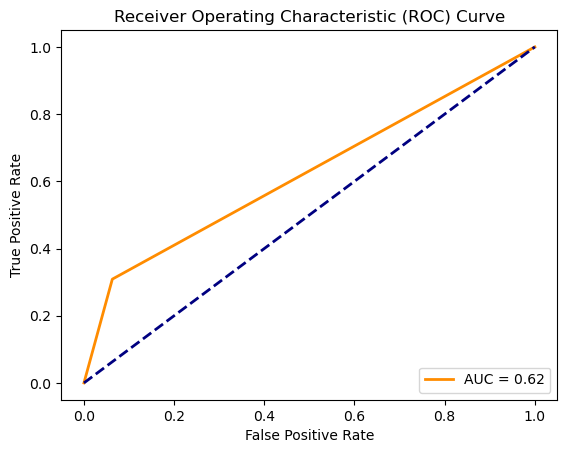

In [55]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important 
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and 
trends.

In [56]:
prundentree = DecisionTreeClassifier(criterion='log_loss',max_depth=5,max_features='log2',splitter = 'random')

In [57]:
prundentree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=5, max_features='log2',
                       splitter='random')

[Text(0.4125, 0.9166666666666666, 'x[2] <= 62.014\nlog_loss = 0.891\nsamples = 428\nvalue = [296, 132]'),
 Text(0.145, 0.75, 'x[1] <= 93.565\nlog_loss = 0.726\nsamples = 94\nvalue = [75, 19]'),
 Text(0.08, 0.5833333333333334, 'x[1] <= 81.338\nlog_loss = 0.235\nsamples = 26\nvalue = [25, 1]'),
 Text(0.06, 0.4166666666666667, 'x[6] <= 0.358\nlog_loss = 0.503\nsamples = 9\nvalue = [8, 1]'),
 Text(0.04, 0.25, 'x[5] <= 30.165\nlog_loss = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.02, 0.08333333333333333, 'log_loss = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.06, 0.08333333333333333, 'log_loss = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.08, 0.25, 'log_loss = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.1, 0.4166666666666667, 'log_loss = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.21, 0.5833333333333334, 'x[5] <= 23.711\nlog_loss = 0.834\nsamples = 68\nvalue = [50, 18]'),
 Text(0.14, 0.4166666666666667, 'x[6] <= 0.275\nlog_loss = 0.544\nsamples = 8\nvalue = [7, 1]'),
 Text(0.12, 0.25, 

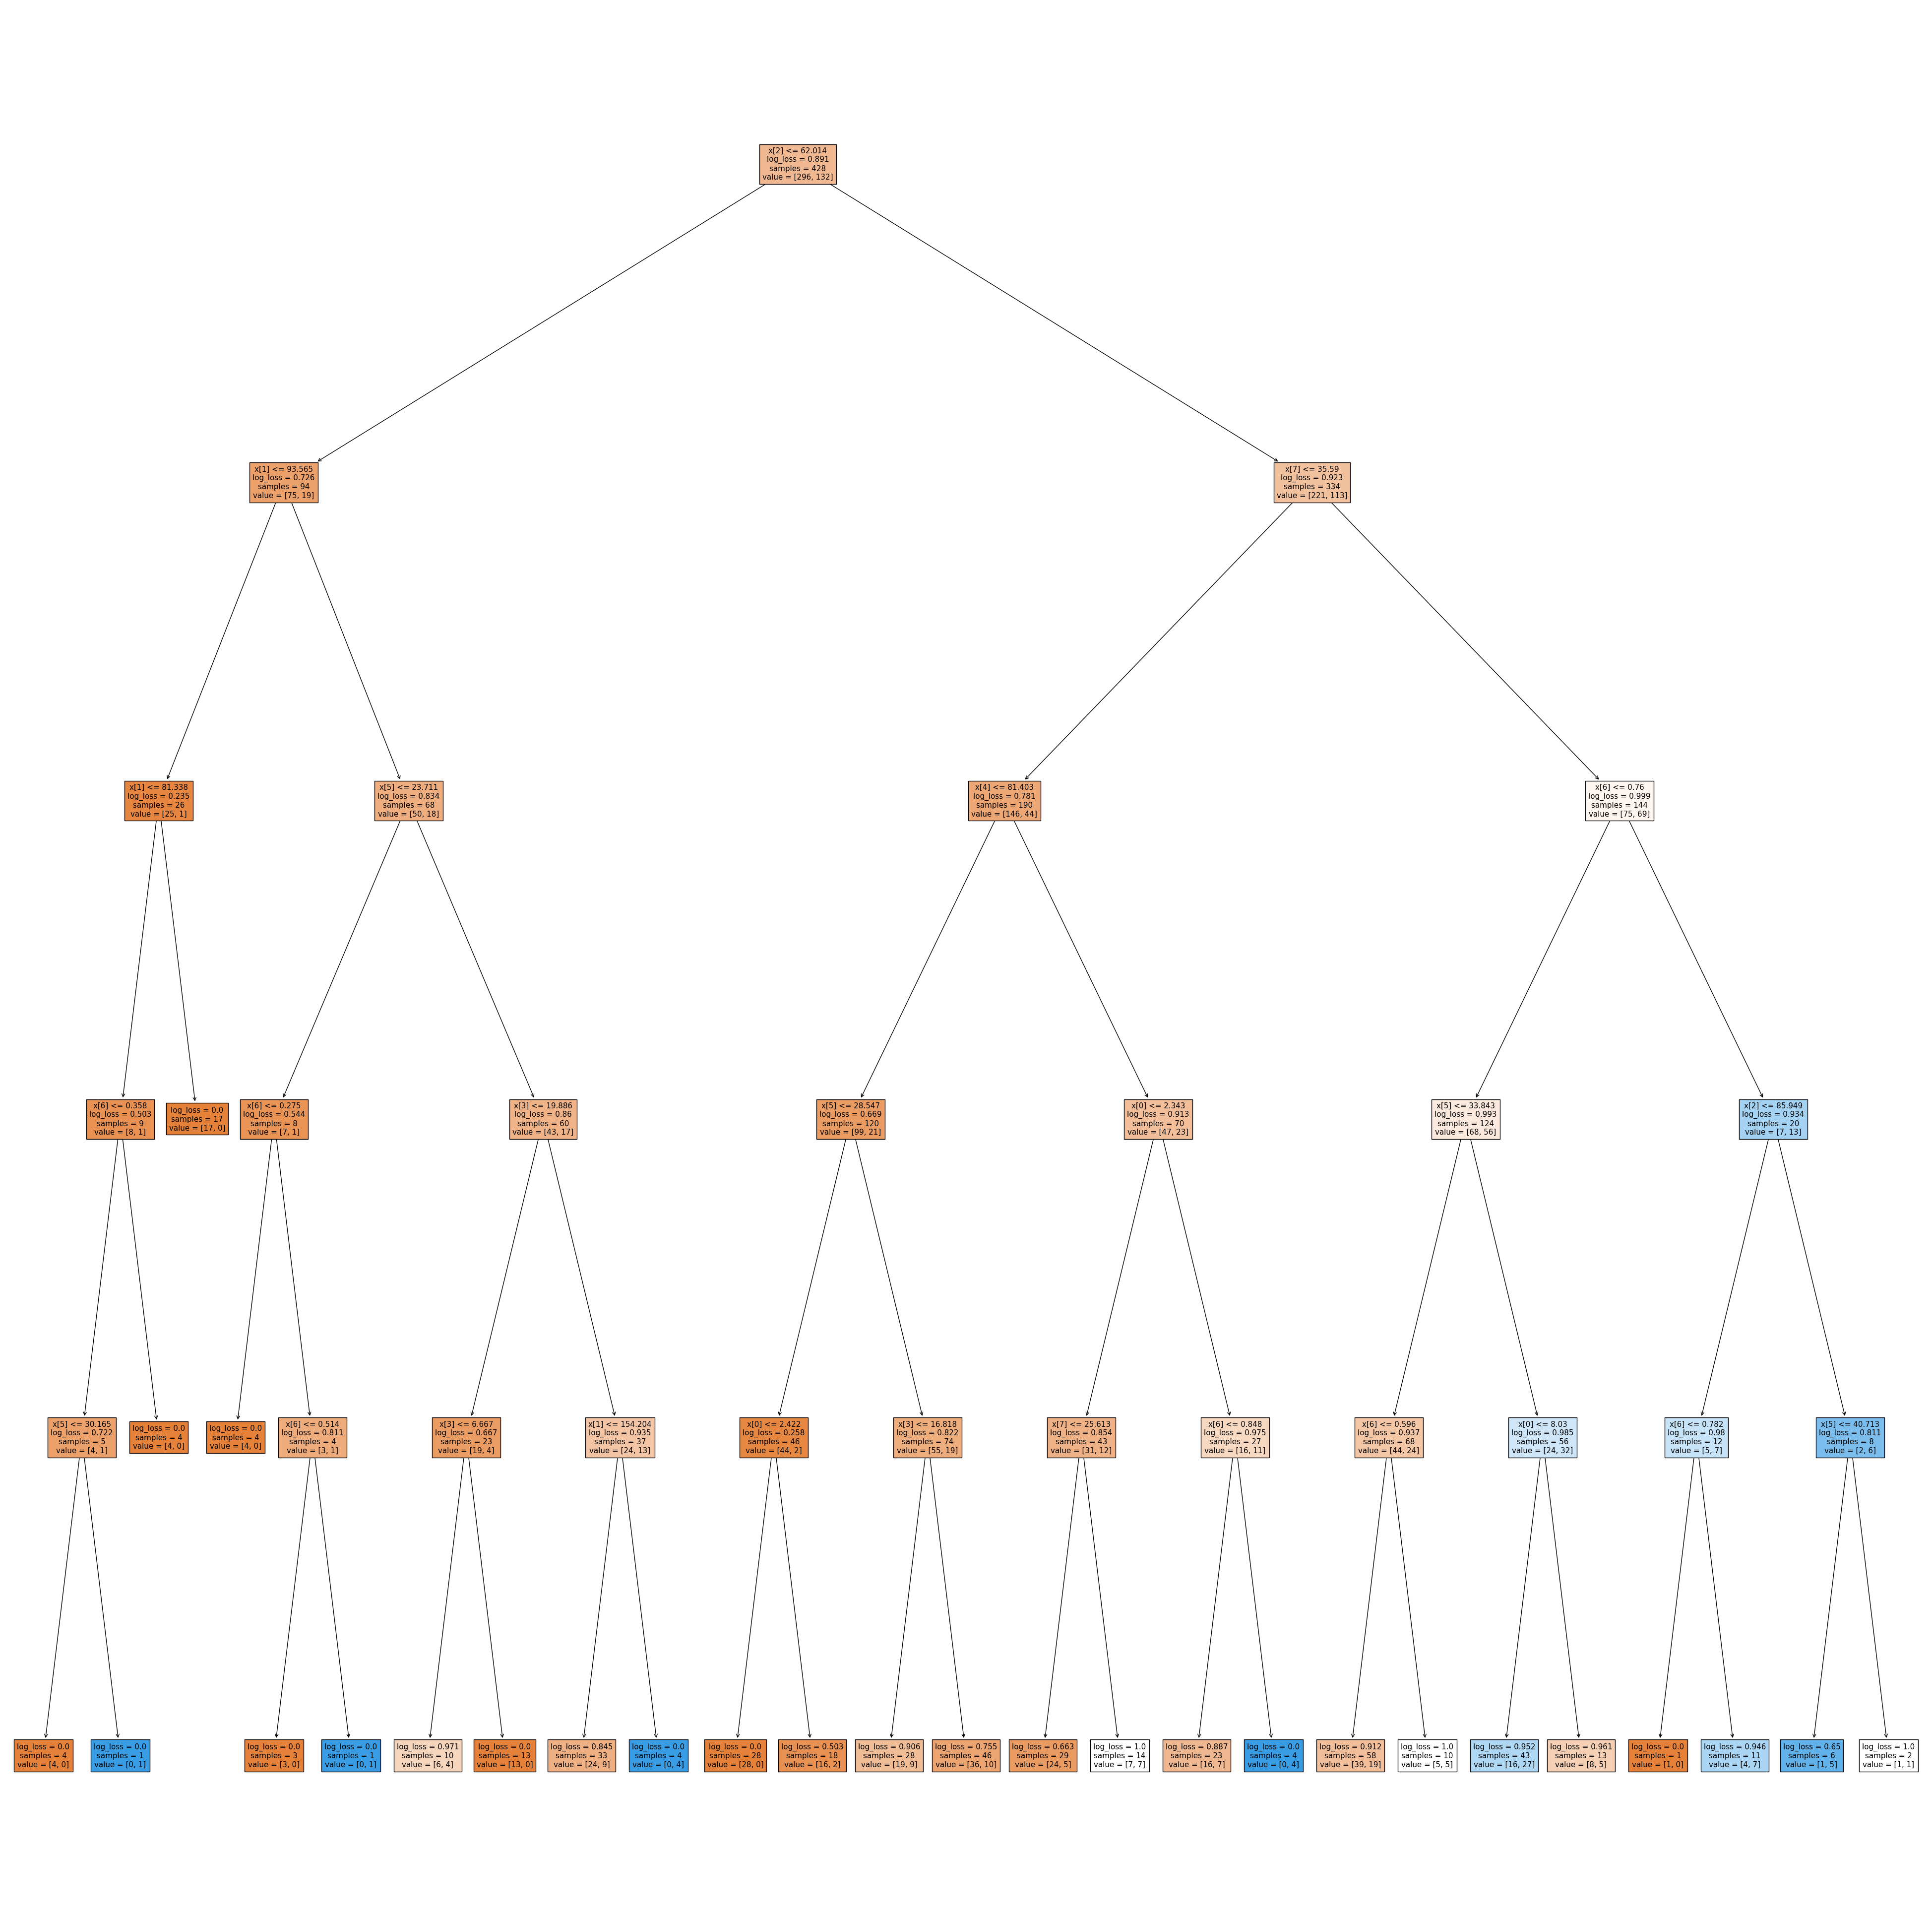

In [60]:
from sklearn import tree
plt.figure(figsize=(50,50))
tree.plot_tree(prundentree, filled = True)

In [62]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30


In [ ]:
- 1st split to decision tree start from BloodPressure and its thresold value is 62.014.
- 2nd split :
    -- Left node of tree splits start fromm Glucose and its thresold value is 93.565.
    -- Right node of tree splits start from Age and its thresold value is 35.59.
    
- 3rd split :
    Left node split :
        - Left node of tree splits starts from Glucose and its thresold value is 81.338.
        - Right node of tree splits start from BMI and its thresold value is 23.711.
    Right node split :
        - Left node of tree splits starts from Insulin and its thresold value is 81.403.
        - Right node of tree splits start from DiabetesPedigreeFunction and its thresold value is 0.76.

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

In [ ]:
Answer :
Validating a decision tree model and testing its robustness to changes in the dataset or environment involves several key 
steps. Here are some techniques, including sensitivity analysis and scenario testing, to help you assess the model's performance 
and understand its limitations:

Holdout Validation:
-Split your dataset into training and testing sets. Train the decision tree model on the training set and evaluate its performance on
the testing set.
-This helps to simulate the model's performance on new, unseen data.

Cross-Validation:
-Use k-fold cross-validation to assess the model's stability and performance across different subsets of the data.
-This technique provides a more robust estimate of the model's generalization performance.

Sensitivity Analysis:
-Analyze the sensitivity of your decision tree model to changes in input features. This involves varying one input feature at a 
time while keeping others constant and observing the impact on the model's predictions.
-Identify which features have the most significant impact on the model's output.

Scenario Testing:
-Create hypothetical scenarios or test cases that represent different conditions or situations the model might encounter.
-Evaluate how well the model performs in these scenarios and whether it exhibits reasonable behavior.

Bootstrap Sampling:
-Perform bootstrap sampling to create multiple subsets of the dataset. Train the decision tree model on each subset and evaluate
its performance.
-This helps assess the model's stability and robustness to variations in the training data.

Feature Importance:
-Assess feature importance to understand which features have the most influence on the decision tree model's predictions.
-This information can guide further analysis and help identify critical features.

Outlier Detection:
-Check how the decision tree model handles outliers. Evaluate its performance on data containing outliers and assess whether
the model's predictions are sensitive to these extreme values.

Parameter Tuning:
-Adjust hyperparameters of the decision tree model using techniques like grid search or random search. Evaluate the model's 
performance with different parameter values.

Change in Data Distribution:
-Introduce variations in the data distribution to mimic changes in the environment. Assess how well the model generalizes to
these changes.

Ensemble Methods:
-Consider using ensemble methods like Random Forests, which involve constructing multiple decision trees and combining their
predictions. Ensembles can often improve robustness and generalization.